# Predicting the Stock Price
Using XGBoost algorithm and VWAP values for Reliance to predict from the past stock market Dataset and then it can be used to calculate the accuracy of this model


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("RELIANCE.csv")
dataset

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5199,2020-11-23,RELIANCE,EQ,1899.50,1951.00,1970.00,1926.25,1955.20,1950.70,1952.18,20918665,4.083704e+15,497781.0,5148955.0,0.2461
5200,2020-11-24,RELIANCE,EQ,1950.70,1964.00,1974.00,1932.00,1971.05,1964.05,1952.11,14277083,2.787044e+15,362587.0,3213843.0,0.2251
5201,2020-11-25,RELIANCE,EQ,1964.05,1980.00,1992.95,1942.20,1947.50,1947.80,1969.06,15062376,2.965874e+15,356793.0,3040444.0,0.2019
5202,2020-11-26,RELIANCE,EQ,1947.80,1953.05,1965.00,1930.05,1957.00,1952.60,1946.67,11924527,2.321309e+15,266412.0,3406506.0,0.2857


In [3]:
dataset.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

In [4]:
dataset.dropna(inplace=True)
dataset

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2850,2011-06-01,RELIANCE,EQ,951.85,952.00,958.65,943.65,947.50,946.80,947.83,1838452,1.742538e+14,58630.0,901415.0,0.4903
2851,2011-06-02,RELIANCE,EQ,946.80,936.55,954.70,936.55,952.50,951.05,947.09,2152963,2.039039e+14,63061.0,1066759.0,0.4955
2852,2011-06-03,RELIANCE,EQ,951.05,960.50,967.00,931.50,936.00,934.60,951.69,4368279,4.157238e+14,128784.0,1035791.0,0.2371
2853,2011-06-06,RELIANCE,EQ,934.60,934.65,940.80,928.15,938.60,937.75,935.29,1405741,1.314771e+14,43384.0,476631.0,0.3391
2854,2011-06-07,RELIANCE,EQ,937.75,933.55,960.00,933.55,959.60,958.25,950.55,4025919,3.826839e+14,88703.0,2424958.0,0.6023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5199,2020-11-23,RELIANCE,EQ,1899.50,1951.00,1970.00,1926.25,1955.20,1950.70,1952.18,20918665,4.083704e+15,497781.0,5148955.0,0.2461
5200,2020-11-24,RELIANCE,EQ,1950.70,1964.00,1974.00,1932.00,1971.05,1964.05,1952.11,14277083,2.787044e+15,362587.0,3213843.0,0.2251
5201,2020-11-25,RELIANCE,EQ,1964.05,1980.00,1992.95,1942.20,1947.50,1947.80,1969.06,15062376,2.965874e+15,356793.0,3040444.0,0.2019
5202,2020-11-26,RELIANCE,EQ,1947.80,1953.05,1965.00,1930.05,1957.00,1952.60,1946.67,11924527,2.321309e+15,266412.0,3406506.0,0.2857


In [5]:
dataset.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [6]:
to_drop = ['Date', 'Symbol', 'Series']
dataset = dataset.drop(columns = to_drop)
dataset

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2850,951.85,952.00,958.65,943.65,947.50,946.80,947.83,1838452,1.742538e+14,58630.0,901415.0,0.4903
2851,946.80,936.55,954.70,936.55,952.50,951.05,947.09,2152963,2.039039e+14,63061.0,1066759.0,0.4955
2852,951.05,960.50,967.00,931.50,936.00,934.60,951.69,4368279,4.157238e+14,128784.0,1035791.0,0.2371
2853,934.60,934.65,940.80,928.15,938.60,937.75,935.29,1405741,1.314771e+14,43384.0,476631.0,0.3391
2854,937.75,933.55,960.00,933.55,959.60,958.25,950.55,4025919,3.826839e+14,88703.0,2424958.0,0.6023
...,...,...,...,...,...,...,...,...,...,...,...,...
5199,1899.50,1951.00,1970.00,1926.25,1955.20,1950.70,1952.18,20918665,4.083704e+15,497781.0,5148955.0,0.2461
5200,1950.70,1964.00,1974.00,1932.00,1971.05,1964.05,1952.11,14277083,2.787044e+15,362587.0,3213843.0,0.2251
5201,1964.05,1980.00,1992.95,1942.20,1947.50,1947.80,1969.06,15062376,2.965874e+15,356793.0,3040444.0,0.2019
5202,1947.80,1953.05,1965.00,1930.05,1957.00,1952.60,1946.67,11924527,2.321309e+15,266412.0,3406506.0,0.2857


## input features and target

In [7]:
dataset.columns

Index(['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume',
       'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'],
      dtype='object')

In [8]:
tar_col = ['VWAP']
Y = dataset[tar_col]
Y

,VWAP
2850,947.83
2851,947.09
2852,951.69
2853,935.29
2854,950.55
...,...
5199,1952.18
5200,1952.11
5201,1969.06
5202,1946.67


In [9]:
X = dataset.drop(columns = tar_col)
X

,Prev Close,Open,High,Low,Last,Close,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2850,951.85,952.00,958.65,943.65,947.50,946.80,1838452,1.742538e+14,58630.0,901415.0,0.4903
2851,946.80,936.55,954.70,936.55,952.50,951.05,2152963,2.039039e+14,63061.0,1066759.0,0.4955
2852,951.05,960.50,967.00,931.50,936.00,934.60,4368279,4.157238e+14,128784.0,1035791.0,0.2371
2853,934.60,934.65,940.80,928.15,938.60,937.75,1405741,1.314771e+14,43384.0,476631.0,0.3391
2854,937.75,933.55,960.00,933.55,959.60,958.25,4025919,3.826839e+14,88703.0,2424958.0,0.6023
...,...,...,...,...,...,...,...,...,...,...,...
5199,1899.50,1951.00,1970.00,1926.25,1955.20,1950.70,20918665,4.083704e+15,497781.0,5148955.0,0.2461
5200,1950.70,1964.00,1974.00,1932.00,1971.05,1964.05,14277083,2.787044e+15,362587.0,3213843.0,0.2251
5201,1964.05,1980.00,1992.95,1942.20,1947.50,1947.80,15062376,2.965874e+15,356793.0,3040444.0,0.2019
5202,1947.80,1953.05,1965.00,1930.05,1957.00,1952.60,11924527,2.321309e+15,266412.0,3406506.0,0.2857


In [20]:
X = np.array(X)
X.shape

(2354, 1)

In [46]:
Y = np.array(Y)
Y.shape

(2354, 1)

# Gradient Boosting


In [43]:
from sklearn import ensemble
gboost = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2, learning_rate=0.1)
gboost.fit(X_train,y_train)

c:\Users\avdhe\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [44]:
Gboost_score = gboost.score(X_test, y_test)
Gboost_score

0.9972603126599111

# XGBoost Model

In [28]:
from numpy import loadtxt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [29]:
#creating a 2D array to convert time series data to index
X_new = []
for i in range(2354):
    temp=[]
    for j in range(1): 
        temp.append(i)
    X_new.append(temp)
X=np.array(X_new)
X

array([[   0],
       [   1],
       [   2],
       ...,
       [2351],
       [2352],
       [2353]])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [66]:
#X_test

XGBoot test and train accuracy score

In [47]:
model = XGBRegressor()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9995247345310164

In [49]:
XGBoost_score = model.score(X_test,y_test)
XGBoost_score

0.9964104215312397

In [40]:
y_pred = model.predict(X_test)
y_pred

array([ 939.5946 ,  793.6026 , 1122.3513 ,  817.5941 ,  873.4857 ,
       2136.845  , 1544.0956 , 1035.9557 ,  808.9128 ,  876.89575,
        880.3732 ,  802.6724 ,  896.34326, 1024.2902 ,  789.022  ,
       1018.523  , 1267.5173 , 1269.7698 ,  891.7896 , 1032.5167 ,
        928.30084,  841.74854,  983.15393, 1342.3453 , 1313.7426 ,
       1274.3982 ,  896.7649 , 1424.1693 ,  935.1694 ,  773.9395 ,
        937.49567, 1263.8928 ,  948.4366 , 1396.3429 ,  923.9222 ,
        865.87256,  937.45624,  856.7674 , 2153.8813 ,  887.80725,
       1045.4326 ,  892.25696, 1085.2108 ,  800.1519 ,  769.06647,
        775.80994,  846.79694,  941.86633,  857.1341 ,  960.91174,
        924.9181 ,  739.1034 ,  844.86053, 1376.1708 , 1738.451  ,
       1952.9089 , 1274.3982 ,  724.9123 , 1009.0589 , 1000.6966 ,
       1262.7875 ,  878.36993,  974.85986, 1347.8618 ,  802.6724 ,
        965.2785 ,  876.89575, 1484.1157 , 1263.6095 , 1276.8553 ,
        903.0006 ,  781.69495,  907.9263 ,  895.98456, 1047.07

In [51]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE : ", mse)

MSE :  44.332225820564645


Text(0, 0.5, 'Predicted(green) &Actual VWAP(red)')

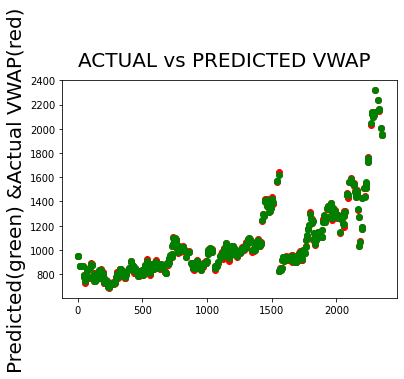

In [65]:
fig = plt.figure()
plt.scatter(X_test, y_test, color='red')
plt.scatter(X_test, y_pred, color='green')
fig.suptitle('ACTUAL vs PREDICTED VWAP',fontsize=20)                    
plt.ylabel('Predicted(green) &Actual VWAP(red)', fontsize=20)

In [42]:
((-scores)**0.5).mean()

56.17369011467199